# **Imports**

In [0]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import scipy

# **Reading the dataset**

In [0]:
! wget 'http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2'
! tar xjf RML2016.10b.tar.bz2

--2020-05-05 19:52:28--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  16.6MB/s    in 92s     

2020-05-05 19:54:00 (12.9 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]



In [0]:
import pickle
import gzip

with open('RML2016.10b.dat', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
# print("keys:")
# print(p.keys())
# print(len(p.keys()))

#**Reading the Data**

In [0]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], p.keys())))), [1,0])
X = []  
y = []
for snr in snrs:
    for mod in mods:
        X.append(p[(mod,snr)])
        for i in range(p[(mod,snr)].shape[0]):  y.append((mod,snr))
X = np.vstack(X)
y = np.array(y)
print(y.shape)

(1200000, 2)


# **Reading and Splitting Data by SNR**

In [0]:
x_snr_separated = []
y_snr_labels = []
for snr in range(-20,20,2):
  i=0;
  for mod in mods:
    x_snr_separated.append( p[(mod,snr)])
    for i in range(p[(mod,snr)].shape[0]):  y_snr_labels.append(mod)
x_snr_separated = np.vstack(X)
x_snr_separated = x_snr_separated.reshape(1200000,2,128)
y_snr_labels = np.vstack(y_snr_labels)
y_snr_labels = y_snr_labels.reshape( 1200000,1)


# **One Hot Encoding**

In [0]:
from sklearn.preprocessing import OneHotEncoder
y_mod = y[:,0]
y_mod = y_mod.reshape( 1200000,1)
print("y mod shape ", y_mod.shape)
ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(y_mod).toarray()
print( y_ohe.shape)

y_snr_ohe = ohe.fit_transform(y_snr_labels).toarray()
print( y_snr_ohe.shape)

y mod shape  (1200000, 1)
(1200000, 10)
(1200000, 10)


# **Splitting Data + One Hot Encoding**

In [0]:
#PROBABLY WILL DELETE THIS CELL
# 70% training 30% testing
# 5% validation from training
# Splitting the train-test
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, random_state=1,test_size=0.3)
# Splitting the train-validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, random_state=1,test_size=0.05)


splitting the data manually

In [0]:
snr_train = np.zeros((1,2,128))
snr_validation = np.zeros((1,2,128))
snr_test = np.zeros((1,2,128))

y_snr_train = np.zeros((1,10))
y_snr_validation = np.zeros((1,10))
y_snr_test = np.zeros(( 1,10))

for i in range(20):
  starting_index = i*60000
  ending_index = starting_index + 60000
  curr_snr_block = x_snr_separated[starting_index:ending_index, :, :]

  curr_snr_ohe = y_snr_ohe[starting_index:ending_index, :]

  tmp_train, tmp_test, tmp_labels_train, tmp_labels_test = train_test_split( curr_snr_block, curr_snr_ohe, random_state=1,test_size=0.3)

  tmp_train, tmp_val, tmp_labels_train, tmp_labels_val = train_test_split( tmp_train, tmp_labels_train, random_state=1,test_size=0.05)


  snr_train = np.concatenate(( snr_train, tmp_train), axis = 0)
  y_snr_train = np.concatenate(( y_snr_train, tmp_labels_train), axis=0)

  snr_validation = np.concatenate(( snr_validation, tmp_val), axis=0)
  y_snr_validation = np.concatenate(( y_snr_validation, tmp_labels_val), axis=0)

  snr_test = np.concatenate(( snr_test , tmp_test), axis = 0)
  y_snr_test = np.concatenate(( y_snr_test , tmp_labels_test), axis=0)

snr_train = snr_train[1:, :,:]
y_snr_train = y_snr_train[1:,:]

snr_validation = snr_validation[1:,:,:]
y_snr_validation = y_snr_validation[1:,:]

snr_test = snr_test[1:, :,:]
y_snr_test = y_snr_test[1:,:]


# **Label Encoding**

In [0]:
from sklearn.preprocessing import LabelEncoder
from numpy import array
# Label Encoder
y_label_encoded = y[:,0]
values = array(y_label_encoded)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(values)
print(y_encoded.shape)

(1200000,)


# **Splitting Data + Label Encoding**

In [0]:
# 70% training 30% testing
# 5% validation from training
# Splitting the train-test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1,test_size=0.3)
# Splitting the train-validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, random_state=1,test_size=0.05)

NameError: ignored

# **Derivative**

In [0]:
# np.gradient
# X_train_der = np.gradient(X_train)
# X_validation_der = np.gradient(X_validation)
# X_test_der = np.gradient(X_test)
zero_train = np.zeros((798000,2,1))
zero_validation = np.zeros((42000,2,1))
zero_test = np.zeros((360000,2,1))
X_train_der =  np.diff(X_train)
X_validation_der = np.diff(X_validation)
X_test_der = np.diff(X_test)
X_train_der = np.concatenate((zero_train,X_train_der),axis=2)
X_validation_der = np.concatenate((zero_validation,X_validation_der),axis=2)
X_test_der = np.concatenate((zero_test,X_test_der),axis=2)
X_train_der.shape

NameError: ignored

Derivatives for snr separated data

In [0]:
zero_snr_train = np.zeros((798000,2,1))
zero_snr_validation = np.zeros((42000,2,1))
zero_snr_test = np.zeros((360000,2,1))

snr_train_der =  np.diff( snr_train)
snr_validation_der = np.diff( snr_validation)
snr_test_der = np.diff( snr_test)

snr_train_der = np.concatenate((zero_snr_train, snr_train_der),axis=2)
snr_validation_der = np.concatenate((zero_snr_validation, snr_validation_der),axis=2)
snr_test_der = np.concatenate((zero_snr_test, snr_test_der),axis=2)

# **Integration**

In [0]:
X_train_int = scipy.integrate.cumtrapz(X_train, initial=0)
X_validation_int = scipy.integrate.cumtrapz(X_validation, initial=0)
X_test_int = scipy.integrate.cumtrapz(X_test, initial=0)
X_train_int.shape

(798000, 2, 128)

Integrate data separated by snr

In [0]:
snr_train_int = scipy.integrate.cumtrapz( snr_train, initial=0)
snr_validation_int = scipy.integrate.cumtrapz( snr_validation, initial=0)
snr_test_int = scipy.integrate.cumtrapz( snr_test, initial=0)

# **Combination**

In [0]:
#  concatenate till 6x128 rather than 2x128
train_comb = np.concatenate((X_train,X_train_der,X_train_int),axis=1)
print(train_comb.shape)
validation_comb = np.concatenate((X_validation,X_validation_der,X_validation_int),axis=1)
print(validation_comb.shape)
test_comb = np.concatenate((X_test,X_test_der,X_test_int),axis=1)
print(test_comb.shape)


NameError: ignored

In [0]:
snr_train_comb = np.concatenate((snr_train, snr_train_der, snr_train_int),axis=1)
print(snr_train_comb.shape)
snr_validation_comb = np.concatenate((snr_validation,snr_validation_der,snr_validation_int),axis=1)
print(snr_validation_comb.shape)
snr_test_comb = np.concatenate((snr_test, snr_test_der, snr_test_int),axis=1)
print(snr_test_comb.shape)

(798000, 6, 128)
(42000, 6, 128)
(360000, 6, 128)


# **Reshaping**

*Raw data*

In [0]:
# X_r = X_train.reshape(798000,256)
# X_v = X_validation.reshape(42000,256)
# X_t = X_test.reshape(360000,256)

In [0]:
X_r = X_train.reshape(X_train.shape[0],-1)
print(X_r.shape)
X_v = X_validation.reshape(42000,256)
print(X_v.shape)
X_t = X_test.reshape(360000,256)
print(X_t.shape)

(798000, 256)
(42000, 256)
(360000, 256)


*Combined data*

In [0]:
X_r_comb = train_comb.reshape(train_comb.shape[0],-1)
print(X_r_comb.shape)
X_v_comb= validation_comb.reshape(validation_comb.shape[0],-1)
print(X_v_comb.shape)
X_t_comb = test_comb.reshape(test_comb.shape[0],-1)
print(X_t_comb.shape)

(798000, 768)
(42000, 768)
(360000, 768)


# **Decision Tree Classifier**

In [0]:
model = tree.DecisionTreeClassifier()

 **Classification using raw training data**


In [0]:
model.fit(X_r, y_train)
y_val_predict = model.predict(X_v)
print('Accuracy with validation ',accuracy_score(y_validation, y_val_predict))
y_test_predict = model.predict(X_t)
print('Accuracy with test ',accuracy_score(y_test, y_test_predict))

 **Classification using Combined training data (data,derivative,integral)**

In [0]:
model.fit(X_r_comb, y_train)
y_val_predict = model.predict(X_v_comb)
print('Accuracy with validation ',accuracy_score(y_validation, y_val_predict))
y_test_predict = model.predict(X_t_comb)
print('Accuracy with test ',accuracy_score(y_test, y_test_predict))

# **Random Forest Classifier**

In [0]:
clf = RandomForestClassifier(n_jobs=4, random_state=0)

**Classification using raw data**

In [0]:
clf.fit(X_r, y_train)
y_val_predict = clf.predict(X_v)
print('Accuracy with validation ',accuracy_score(y_validation, y_val_predict))
y_test_predict = clf.predict(X_t)
print('Accuracy with test ',accuracy_score(y_test, y_test_predict))

**Classification using combined data**

In [0]:
clf.fit(X_r_comb, y_train)
y_val_predict = clf.predict(X_v_comb)
print('Accuracy with validation ',accuracy_score(y_validation, y_val_predict))
y_test_predict = clf.predict(X_t_comb)
print('Accuracy with test ',accuracy_score(y_test, y_test_predict))

# **Logistic Regression Classifier**

In [0]:
clf = LogisticRegression(random_state=0, max_iter=250)

Classification using raw data

In [0]:
clf.fit(X_r, y_train)
y_val_predict = clf.predict(X_v)
print('Accuracy with validation ',accuracy_score(y_validation, y_val_predict))
y_test_predict = clf.predict(X_t)
print('Accuracy with test ',accuracy_score(y_test, y_test_predict))

Classification using combined data

In [0]:
clf.fit(X_r_comb, y_train)
y_val_predict = clf.predict(X_v_comb)
print('Accuracy with validation ',accuracy_score(y_validation, y_val_predict))
y_test_predict = clf.predict(X_t_comb)
print('Accuracy with test ',accuracy_score(y_test, y_test_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy with validation  0.16438095238095238
Accuracy with test  0.16364166666666666


# **Fully Connected Layer Classifier**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import Adam



def fully_connected(input_sz):
    model = Sequential()
    model.add(Reshape(input_sz+[1], input_shape=input_sz))
    model.add(Flatten())
    model.add(Dense(256 ,activation='relu', kernel_initializer='he_normal', name="dense1"))
    model.add(Dense(200, activation='relu', kernel_initializer='he_normal', name="dense2"))
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense3"))
    model.add(Dense(10, activation='softmax'))
    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy'])
    model.summary()
    return model 

We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs
#Now the training step output will also contain validation accuracy.

In [0]:
from keras.callbacks import EarlyStopping
#Call This Function to pass in the data and Train your Model

def train_model(train_data, train_labels, validation_data, validation_labels):
  es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= int(20))]
  input_size = list(train_data.shape[1:])
  model = fully_connected(input_size)
  history = model.fit(train_data, train_labels , validation_data =(validation_data, validation_labels ), epochs=50, batch_size=700, callbacks= es, shuffle = 'true')
  return model,history


#Predicting
This step is inverse one hot encoding process. We will get integer labels using this step. We can predict on test data using a simple method of keras, model.predict(). It will take the test data as input and will return the prediction outputs as softmax.

In [0]:
import sklearn 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
def predict_test_data( test_data, y_test_labels, model ):
  y_pred = model.predict(test_data)
  #Converting predictions to label
  pred = list()
  for i in range(len(y_pred)):
      pred.append(np.argmax(y_pred[i]))
  #Converting one hot encoded test label to label
  test = list()
  for i in range(len(y_test_labels)):
      test.append(np.argmax(y_test_labels[i]))
  a = accuracy_score(pred,test)
  print(test)
  cf_m = confusion_matrix( test, pred)
  #disp = sklearn.metrics.plot_confusion_matrix( model , test_data , y_test_labels, labels= None, sample_weight=None, normalize=None)
  #plt.show()
  print('Accuracy is:', a*100)
  return a, cf_m

# **Loop on each snr value**

In [0]:
#Call on Raw Data
model, history = train_model( snr_train, y_snr_train, snr_validation, y_snr_validation)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 2, 128, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense1 (Dense)               (None, 256)               65792     
_________________________________________________________________
dense2 (Dense)               (None, 200)               51400     
_________________________________________________________________
dense3 (Dense)               (None, 128)               25728     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 144,210
Trainable params: 144,210
Non-trainable params: 0
________________________________________________

In [0]:
#Call on Combined Data
model, history = train_model( snr_train_comb, y_snr_train, snr_validation_comb, y_snr_validation)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 6, 128, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense1 (Dense)               (None, 256)               196864    
_________________________________________________________________
dense2 (Dense)               (None, 200)               51400     
_________________________________________________________________
dense3 (Dense)               (None, 128)               25728     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 275,282
Trainable params: 275,282
Non-trainable params: 0
________________________________________________

In [0]:
#Raw Data
snr_accuracy_array = np.zeros((20,1))
for i in range(20):
  starting_index = i*18000
  td = snr_test[ starting_index :starting_index +18000 ,:,:]
  ld = y_snr_test[starting_index: starting_index+18000,:]
  a = predict_test_data( td, ld, model)
  snr_accuracy_array[i] = a
print(snr_accuracy_array)

Accuracy is: 10.027777777777777
Accuracy is: 10.327777777777778
Accuracy is: 11.983333333333333
Accuracy is: 13.950000000000001
Accuracy is: 17.316666666666666
Accuracy is: 22.866666666666667
Accuracy is: 29.522222222222222
Accuracy is: 38.73888888888889
Accuracy is: 51.794444444444444
Accuracy is: 61.82222222222222
Accuracy is: 66.47777777777777
Accuracy is: 69.4888888888889
Accuracy is: 70.5611111111111
Accuracy is: 71.1
Accuracy is: 70.89999999999999
Accuracy is: 71.25555555555556
Accuracy is: 71.26666666666667
Accuracy is: 70.92222222222222
Accuracy is: 71.01111111111112
Accuracy is: 70.72777777777777
[[0.10027778]
 [0.10327778]
 [0.11983333]
 [0.1395    ]
 [0.17316667]
 [0.22866667]
 [0.29522222]
 [0.38738889]
 [0.51794444]
 [0.61822222]
 [0.66477778]
 [0.69488889]
 [0.70561111]
 [0.711     ]
 [0.709     ]
 [0.71255556]
 [0.71266667]
 [0.70922222]
 [0.71011111]
 [0.70727778]]


In [0]:
#Combined Data
snr_accuracy_array = np.zeros((20,1))
for i in range(20):
  starting_index = i*18000
  td = snr_test_comb[ starting_index :starting_index +18000 ,:,:]
  ld = y_snr_test[starting_index: starting_index+18000,:]
  a = predict_test_data( td, ld, model)
  snr_accuracy_array[i] = a
print(snr_accuracy_array)

Accuracy is: 10.527777777777777
Accuracy is: 10.722222222222221
Accuracy is: 12.327777777777778
Accuracy is: 14.444444444444443
Accuracy is: 17.744444444444444
Accuracy is: 23.933333333333334
Accuracy is: 32.666666666666664
Accuracy is: 44.361111111111114
Accuracy is: 55.78888888888889
Accuracy is: 64.28333333333333
Accuracy is: 69.95555555555556
Accuracy is: 73.45
Accuracy is: 74.57777777777778
Accuracy is: 75.29444444444444
Accuracy is: 75.86666666666667
Accuracy is: 75.53888888888889
Accuracy is: 75.66111111111111
Accuracy is: 75.83888888888889
Accuracy is: 75.67222222222222
Accuracy is: 75.8111111111111
[[0.10527778]
 [0.10722222]
 [0.12327778]
 [0.14444444]
 [0.17744444]
 [0.23933333]
 [0.32666667]
 [0.44361111]
 [0.55788889]
 [0.64283333]
 [0.69955556]
 [0.7345    ]
 [0.74577778]
 [0.75294444]
 [0.75866667]
 [0.75538889]
 [0.75661111]
 [0.75838889]
 [0.75672222]
 [0.75811111]]


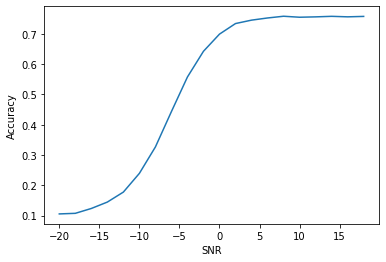

In [0]:
import matplotlib.pyplot as plt
plt.plot(snrs, snr_accuracy_array)
plt.ylabel('Accuracy')
plt.xlabel('SNR')
plt.show()

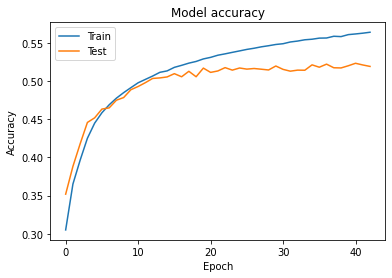

In [0]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

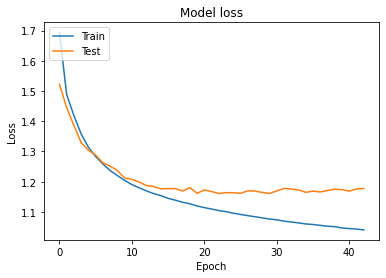

In [0]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# **CNN**

In [0]:
from keras.optimizers import Adam
def cnn(in_shp, dr):
    model = Sequential()
    model.add(Reshape(in_shp+[1], input_shape=in_shp))
    model.add(Conv2D(64, (1, 3), padding='same', activation='relu'))
    model.add(Dropout(dr))
    model.add(Conv2D(16, (2, 3), padding='same', activation='relu'))
    model.add(Dropout(dr))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(10, activation='softmax'))
    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='categorical_crossentropy',
                  optimizer=adam,
                  metrics=['accuracy'])
    return model

In [0]:
input_shape = list( snr_train.shape[1:] ) 
model = cnn(input_shape, 0.1)
model.fit( snr_train, y_snr_train,  batch_size= 700, epochs=50 ,validation_data =( snr_validation , y_snr_validation ), callbacks= es)

_,score = model.evaluate( snr_test , y_snr_test)
print(score)

Train on 798000 samples, validate on 42000 samples
Epoch 1/50
798000/798000 [==============================] - 22s 27us/step - loss: 1.6428 - accuracy: 0.3401 - val_loss: 1.2830 - val_accuracy: 0.4695
Epoch 2/50
798000/798000 [==============================] - 15s 19us/step - loss: 1.2769 - accuracy: 0.4646 - val_loss: 1.2110 - val_accuracy: 0.4851
Epoch 3/50
798000/798000 [==============================] - 15s 19us/step - loss: 1.2354 - accuracy: 0.4799 - val_loss: 1.1878 - val_accuracy: 0.4956
Epoch 4/50
798000/798000 [==============================] - 15s 19us/step - loss: 1.2145 - accuracy: 0.4899 - val_loss: 1.1653 - val_accuracy: 0.5109
Epoch 5/50
798000/798000 [==============================] - 15s 19us/step - loss: 1.1947 - accuracy: 0.4988 - val_loss: 1.1759 - val_accuracy: 0.5044
Epoch 6/50
798000/798000 [==============================] - 15s 19us/step - loss: 1.1820 - accuracy: 0.5038 - val_loss: 1.1495 - val_accuracy: 0.5136
Epoch 7/50
798000/798000 [=======================

In [0]:
snr_accuracy_array = np.zeros((20,1))
for i in range(20):
  starting_index = i*18000
  td = snr_test[ starting_index :starting_index +18000 ,:,:]
  ld = y_snr_test[starting_index: starting_index+18000,:]
  _,a = model.evaluate( td, ld)
  snr_accuracy_array[i] = a
print(snr_accuracy_array)

18000/18000 [==============================] - 1s 63us/step
[[0.10494445]
 [0.10872222]
 [0.11544444]
 [0.12911111]
 [0.17155555]
 [0.28233334]
 [0.39327776]
 [0.49200001]
 [0.60111111]
 [0.70327777]
 [0.7871111 ]
 [0.81494445]
 [0.82522219]
 [0.82611114]
 [0.82438886]
 [0.82688886]
 [0.82544446]
 [0.82566667]
 [0.82633334]
 [0.82450002]]


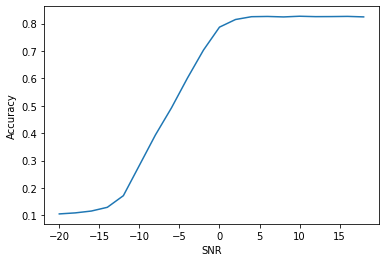

In [0]:
import matplotlib.pyplot as plt
plt.plot(snrs, snr_accuracy_array)
plt.ylabel('Accuracy')
plt.xlabel('SNR')
plt.show()

[2, 3, 7, 2, 7, 8, 6, 1, 1, 8, 9, 1, 1, 3, 8, 2, 4, 2, 7, 6, 8, 1, 1, 4, 9, 3, 3, 7, 2, 3, 9, 0, 7, 5, 5, 2, 3, 6, 0, 3, 3, 3, 9, 7, 6, 6, 1, 3, 2, 7, 3, 4, 8, 0, 3, 2, 3, 7, 1, 4, 2, 2, 2, 2, 7, 7, 1, 4, 8, 1, 3, 7, 6, 9, 8, 3, 0, 5, 9, 3, 1, 2, 2, 6, 6, 2, 9, 9, 1, 5, 5, 6, 2, 8, 5, 4, 5, 5, 0, 3, 9, 2, 0, 4, 2, 9, 9, 4, 6, 9, 4, 0, 5, 7, 3, 2, 7, 7, 9, 8, 3, 1, 3, 3, 1, 3, 1, 7, 0, 8, 0, 5, 2, 5, 5, 1, 1, 1, 0, 5, 3, 2, 7, 4, 3, 8, 3, 9, 7, 8, 2, 4, 1, 4, 6, 5, 6, 3, 7, 8, 6, 3, 5, 9, 0, 9, 7, 6, 0, 8, 2, 2, 6, 8, 8, 9, 6, 3, 8, 6, 3, 6, 2, 6, 9, 7, 2, 7, 7, 3, 0, 2, 0, 7, 7, 6, 1, 6, 9, 6, 3, 8, 9, 6, 3, 8, 7, 4, 8, 7, 9, 9, 7, 4, 8, 8, 7, 4, 6, 4, 6, 2, 2, 2, 9, 0, 4, 9, 5, 0, 4, 1, 1, 7, 1, 2, 3, 1, 6, 9, 5, 4, 6, 5, 6, 7, 3, 0, 2, 1, 4, 6, 4, 8, 5, 2, 8, 9, 8, 4, 4, 7, 0, 3, 8, 0, 5, 3, 0, 2, 9, 1, 4, 8, 1, 5, 2, 9, 6, 7, 3, 3, 0, 6, 6, 3, 6, 0, 3, 6, 3, 3, 1, 1, 2, 4, 6, 5, 3, 2, 9, 5, 9, 2, 9, 3, 0, 8, 1, 0, 7, 3, 1, 7, 5, 7, 0, 3, 6, 1, 2, 7, 8, 8, 0, 2, 1, 5, 5, 8, 0, 6, 7, 

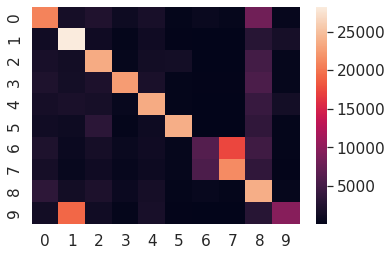

In [0]:
import pandas as pd
import seaborn as sn
a, cf_matrix = predict_test_data( snr_test, y_snr_test, model)
df_cm = pd.DataFrame( cf_matrix , range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot= False, annot_kws={"size": 16}) # font size

plt.show()